In [1]:
from pathlib import Path
import pandas as pd
import woodsort.nwb as nwb 
import pynapple as nap
import spikeinterface.full as si
import warnings
import neuroconv.tools.spikeinterface as nc

In [2]:
### SPECIFY PATHS ### 

data_path = Path('/home/avadher/Data/Anna/')
session_name = 'H7407-250815'
meta_name = 'H7400_metadata.xlsx'
sorter = 'mountainsort5'
#sorter = 'kilosort4'
analyzer_name = session_name + "_analyzer_" + sorter
analyzer_path = data_path / session_name / analyzer_name
#nwb_path = data_path / 'NWB' / session_name 
nwb_path = data_path / 'NWB' / session_name
nwb_name = session_name + '_' + sorter

#nwb_path = data_path / "NWB" / f"{session_name}-{sorter}"
sleep_path = data_path / session_name / 'Sleep'

session_path = list(data_path.rglob(session_name))[0]

# Ignore annoying warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)


In [3]:
### LOAD DATA ###

metadata = nwb.io.read_metadata_excel(data_path / meta_name, session_name, print_output=True)
start_time = nwb.io.get_start_time(session_path)

# load stuff 
tracking = pd.read_csv(session_path / 'TrackingProcessed.csv',index_col=0, header=0)
pos = nap.TsdFrame(tracking[["x", "y"]])
hd = nap.Tsd(tracking['hd'])
epochs = pd.read_csv(session_path / 'EpochTimestamps.csv', header=0)
track_dist = nwb.io.get_matlab_trackdistance(session_path / 'TrackDistance.mat', vbl_name='trackdist')

# add probe 
analyzer = si.load_sorting_analyzer(analyzer_path)


{'epoch': {'1': 'sleep5',
           '2': 'cueone3',
           '3': 'sleep6',
           '4': 'cueone_textures1',
           '5': 'sleep7',
           '6': 'cueone_textures2',
           '7': None,
           '8': None},
 'file': {'experiment_description': 'Place cell recordings',
          'experimenter': 'Rastedt, Anna',
          'institution': 'University of Edinburgh',
          'lab': 'Wood/Dudchenko lab',
          'name': 'H7407-250815',
          'notes': 'protocol_v3',
          'protocol': 'session2',
          'session_description': 'Novel linear track with distal visual and local cue '
                                 'manipulations'},
 'probe': [{'description': '6x10-channels, implanted along the AP axis. Channels sorted top to '
                           'bottom of shank.',
            'id': 1,
            'location': 'right CA1',
            'nshanks': 6.0,
            'step': 20.0,
            'type': 'Neuronexus Buzsaki64sp probe'}],
 'subject': {'dob': 250531.0,
  

In [4]:
### NWB ### 

#Create NWB file
nwbfile = nwb.convert.create_nwb_file(metadata, start_time)

# Add units
nwbfile = nwb.convert.add_spikeinterface_openephys(nwbfile, analyzer, merging_mode='soft')

# Add tracking
nwbfile = nwb.convert.add_tracking(nwbfile, pos, hd)

# Add track distance 
nwbfile = nwb.convert.add_misc_tsd(nwbfile, track_dist, name='track_distance', description='Position along the track', unit='cm')

# Add epochs
nwbfile = nwb.convert.add_epochs(nwbfile, epochs, metadata)

# Add sleep scoring and pseudo EMG
nwbfile = nwb.convert.add_sleep(nwbfile, sleep_path, session_name)

# Save NWB file
nwbfile = nwb.convert.save_nwb_file(nwbfile, nwb_path, nwb_name)

# Load to check
rec = nwb.convert.load_nwb_file(nwb_path, nwb_name)

# print units table
print(rec['units']) 



Creating NWB file and adding metadata...

Adding SpikeInterface units and metrics to the NWB file...

Applying curation from file /home/avadher/Data/Anna/H7407-250815/H7407-250815_analyzer_mountainsort5/spikeinterface_gui/curation_data.json


/home/avadher/.conda/envs/woodsort/lib/python3.10/site-packages/numba/np/ufunc/parallel.py:373: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)
/home/avadher/.conda/envs/woodsort/lib/python3.10/site-packages/numpy/_core/_methods.py:223: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/avadher/.conda/envs/woodsort/lib/python3.10/site-packages/numpy/_core/_methods.py:181: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/avadher/.conda/envs/woodsort/lib/python3.10/site-packages/numpy/_core/_methods.py:215: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


noise_level (workers: 12 processes):   0%|          | 0/20 [00:00<?, ?it/s]

calculate_pc_metrics:   0%|          | 0/2 [00:00<?, ?it/s]

   location                                              group group_name  \
id                                                                          
0   unknown  0 pynwb.ecephys.ElectrodeGroup at 0x1400784522...          0   
1   unknown  0 pynwb.ecephys.ElectrodeGroup at 0x1400784522...          0   
2   unknown  0 pynwb.ecephys.ElectrodeGroup at 0x1400784522...          0   
3   unknown  0 pynwb.ecephys.ElectrodeGroup at 0x1400784522...          0   
4   unknown  0 pynwb.ecephys.ElectrodeGroup at 0x1400784522...          0   
5   unknown  0 pynwb.ecephys.ElectrodeGroup at 0x1400784522...          0   
6   unknown  0 pynwb.ecephys.ElectrodeGroup at 0x1400784522...          0   
7   unknown  0 pynwb.ecephys.ElectrodeGroup at 0x1400784522...          0   
8   unknown  0 pynwb.ecephys.ElectrodeGroup at 0x1400784522...          0   
9   unknown  0 pynwb.ecephys.ElectrodeGroup at 0x1400784522...          0   
10  unknown  1 pynwb.ecephys.ElectrodeGroup at 0x1400784522...          1   

['_AbstractContainer__children', '_AbstractContainer__container_source', '_AbstractContainer__field_values', '_AbstractContainer__fieldsconf', '_AbstractContainer__gather_fields', '_AbstractContainer__modified', '_AbstractContainer__name', '_AbstractContainer__obj', '_AbstractContainer__object_id', '_AbstractContainer__parent', '_AbstractContainer__read_io', '_Data__data', '__abstractmethods__', '__bool__', '__class__', '__del__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__fields__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_check_field_spec', '_check_field_spec_keys', '_data_type_attr', '_experimental', '_field_config', '_fieldsname', '_get_fields', '_get_type_map', '_getter', '_in_construct_mode', '

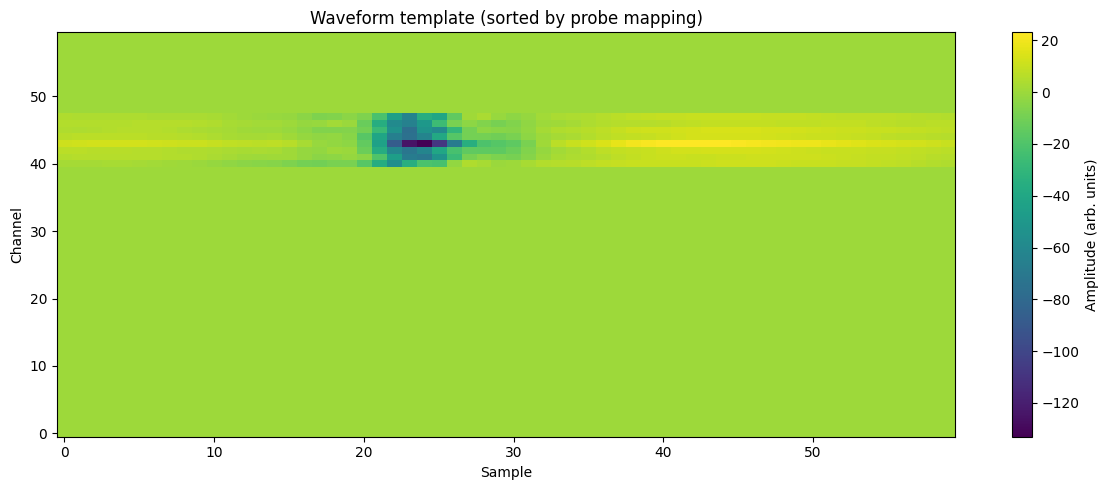

In [22]:
import matplotlib.pyplot as plt
import numpy as np 

### GET ANATOMICALLY SORTED WAVEFORMS FROM NWB ### 
units_tsgroup = rec['units']
# get electrodes table 
electrodes_table = rec.nwb.electrodes.to_dataframe() # electrode_name is anatomical index (top-bottom shank-wise) 
#electrodes_table['electrode_name'] = electrodes_table['electrode_name'].astype(int) # make sure it's int - SpikeInterface sometimes turns them to strings
electrodes_table['channel_name'] = electrodes_table['channel_name'].str.replace('CH', '', regex=False).astype(int) - 1 # now channel_name is the dat file channel index (0-based)
# To sort the waveform anatomically by shank and then by the y coordinate
electrodes_table = electrodes_table.sort_values(by=['aggregation_key', 'rel_y'], ascending=[True, False])
sort_ix = electrodes_table.index.to_numpy().astype(int) # use index to sort waveforms anatomically 

# load waveform 
print(dir(rec.nwb.units['waveform_mean']))
cell_number = 34 # cell 75 is obvious to track down 
waveforms = rec.nwb.units['waveform_mean']
waveforms = np.asarray(waveforms)
wf = waveforms[cell_number,:,sort_ix] # waveforms are arranged according to a cryptic device_contact_index in SpikeInterface that gets propagated as index here

# plot waveform - it should be spatially localized 
plt.figure(figsize=(12, 5))
im = plt.imshow(wf, aspect="auto", origin="lower")
plt.ylabel("Channel")
plt.xlabel("Sample")
plt.title("Waveform template (sorted by probe mapping)")
plt.colorbar(im, label="Amplitude (arb. units)")
plt.tight_layout()
plt.show()

In [8]:
rec['units']

Index    rate      unit_name    quality    aggregation_key    coord_est_x    ...
-------  --------  -----------  ---------  -----------------  -------------  -----
0        12.11924  0            good       0                  -8.33602       ...
1        5.29114   1            good       0                  -19.64126      ...
2        6.97495   3            good       0                  -18.34458      ...
3        0.71799   4            good       0                  -39.35096      ...
4        1.67294   5            good       0                  -48.99011      ...
5        0.99333   8            good       0                  -22.899        ...
6        3.87676   9            good       0                  -18.71961      ...
...      ...       ...          ...        ...                ...            ...
23       1.38567   28           good       3                  465.91434      ...
24       18.56183  29           good       3                  505.90972      ...
25       0.69431   30     